In [11]:
import  math
import numpy as np
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [15]:
datadir="./data/"
HNLO=yoda.readYODA(datadir+"NLOjet.yoda")
HNNLO=yoda.readYODA(datadir+"NNLOjet.yoda")
HNLOPS1=yoda.readYODA(datadir+"HW7-dipole-CMW.yoda")
HNLOPS2=yoda.readYODA(datadir+"PWG-PY8-manyR.yoda")
HNLOPS3=yoda.readYODA(datadir+"SherpaCMW.yoda")
psobs='deltaphi_jj'
foobs='deltaphi_jj'
obsname='$\Delta\phi_{jj}$'
myxrange=[0.,3.14]
logxscale=False
logyscale=False

<Figure size 432x288 with 0 Axes>

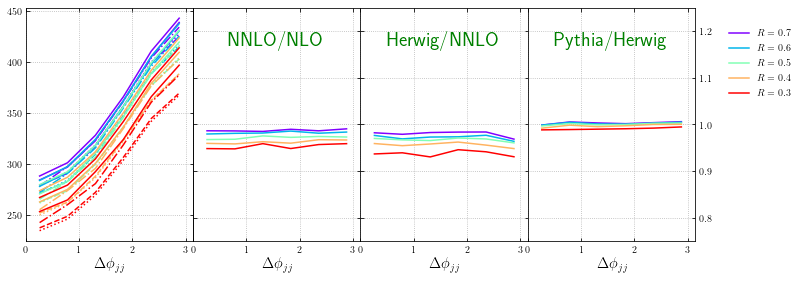

In [19]:
plt.clf()

fig = plt.figure(figsize=(12, 4.3))
gs = gridspec.GridSpec(1, 12)
gs.update(wspace=0.0, hspace=0.0)
ax1 = plt.subplot(gs[0, 3:6])
if logxscale: plt.xscale('log')
ax2 = plt.subplot(gs[0, 6:9])
if logxscale: plt.xscale('log')
ax3 = plt.subplot(gs[0, 9:12])
if logxscale: plt.xscale('log')
ax4 = plt.subplot(gs[0, 0:3])
if logxscale: plt.xscale('log')
if logyscale: plt.yscale('log')

colors = cm.rainbow(np.linspace(0, 1, 5))

Rs=reversed(["0.3","0.4","0.5","0.6","0.7"])

for R,col in zip(Rs,colors):
    x=np.array(HNLOPS1['/MC_HJETSVBF/'+psobs+'_%s_heavy_forward'%R].xVals())
    hnlo=np.array([HNLO['/MC_HJETSVBF/'+foobs+'_%s_heavy_forward'%R].bin(i).height for i in range(0,len(x))])
    hnnlo=np.array([HNNLO['/MC_HJETSVBF/'+foobs+'_%s_heavy_forward'%R].bin(i).height for i in range(0,len(x))])
    hps1=np.array([HNLOPS1['/MC_HJETSVBF/'+psobs+'_%s_heavy_forward'%R].bin(i).height for i in range(0,len(x))])
    hps2=np.array([HNLOPS2['/MC_HJETSVBF/'+psobs+'_%s_heavy_forward'%R].bin(i).height for i in range(0,len(x))])
    hps3=np.array([HNLOPS3['/MC_HJETSVBF/'+psobs+'_%s_heavy_forward'%R].bin(i).height for i in range(0,len(x))])
    ax1.plot(x,hnnlo/hnlo,c=col,label="$R=%s$"%R)
    ax2.plot(x,hps1/hnnlo,c=col,label="$R=%s$"%R)
    ax3.plot(x,hps2/hps1,c=col,label="$R=%s$"%R)
    ax4.plot(x,hnlo,c=col,label="$R=%s$"%R)
    ax4.plot(x,hnnlo,c=col,linestyle="solid")
    ax4.plot(x,hps1,c=col,linestyle="dashed")
    ax4.plot(x,hps2,c=col,linestyle="dotted")
    ax4.plot(x,hps3,c=col,linestyle="dashdot")

ax3.legend(frameon=False,fontsize=10,bbox_to_anchor=(1.05,-0.05, 0.575, 1.0))

ax1.set_xlabel(obsname, fontsize=15)
ax2.set_xlabel(obsname, fontsize=15)
ax3.set_xlabel(obsname, fontsize=15)
ax4.set_xlabel(obsname, fontsize=15)
ax1.set_ylabel(obsname+" ratio", fontsize=15)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(myxrange)
    ax.yaxis.set_ticks_position("both")
    ax.xaxis.set_ticks_position("both")
    ax.grid(linestyle='dotted');
    ax.yaxis.set_tick_params(direction="in",which="both")
    ax.xaxis.set_tick_params(direction="in",which="both")
for ax in [ax1,ax2,ax3]:
    ax.set_ylim([0.75,1.25])

ax4.yaxis.set_label_position("left")
ax1.tick_params(labelleft='False')
ax2.tick_params(labelleft='False')
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()

if logxscale: xmidpos = math.exp((math.log(myxrange[0])+math.log(myxrange[1]))/2) 
else: xmidpos = (myxrange[0]+myxrange[1])/2
ax1.text(xmidpos,1.2,"NNLO/NLO",
        verticalalignment='top',  horizontalalignment='center',
        color='green', fontsize=20)
ax2.text(xmidpos,1.2,"Herwig/NNLO",
        verticalalignment='top',  horizontalalignment='center',
        color='green', fontsize=20)
ax3.text(xmidpos,1.2,"Pythia/Herwig",
        verticalalignment='top',  horizontalalignment='center',
        color='green', fontsize=20)

plt.show()
fig.savefig(psobs+".pdf",bbox_inches='tight')